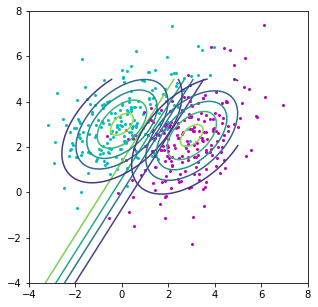

In [4]:
# 1. Class Boundaries and Posterior Probabilities

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            num = P1*gauss2D(xvec, m1, C1)
            den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
            Z[i,j] = num / den
    return X, Y, Z


def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den
def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

NumDataPerClass=200
nx, ny = 200, 200
m1 = np.array([0,3])
m2=np.array([3,2.5])
C1 = np.array([[2,1], [1,2]], np.float32)
C2=C1
P1=P2=0.5
A=np.linalg.cholesky(C1)

U11=np.random.randn(NumDataPerClass,2)
X11=U11@A.T +m1

U22=np.random.randn(NumDataPerClass,2)
X22=U22@A.T +m2
X1,X2,X3=twoDGaussianPlot (nx, ny, m1, C1)
X4,X5,X6=twoDGaussianPlot (nx, ny, m2, C2)
Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X11[:,0], X11[:,1], c="c", s=4)
ax.scatter(X22[:,0], X22[:,1], c="m", s=4)
ax.set_xlim(-4, 8)
ax.set_ylim(-4, 8)
plt.contour(Xp, Yp, Zp, 5)
plt.contour(X1, X2, X3, 5)
plt.contour(X4, X5, X6, 5)

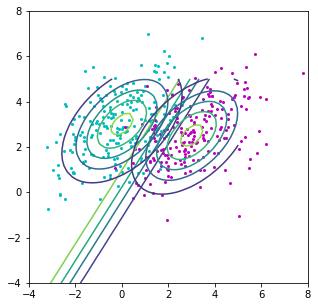

In [5]:

nx, ny = 50, 40
m1 = np.array([0,3])
m2=np.array([3,2.5])
C1 = np.array([[2,1], [1,2]], np.float32)
C2=C1
P1=0.5
P2=0.3
A=np.linalg.cholesky(C1)

U11=np.random.randn(NumDataPerClass,2)
X11=U11@A.T +m1

U22=np.random.randn(NumDataPerClass,2)
X22=U22@A.T +m2
X1,X2,X3=twoDGaussianPlot (nx, ny, m1, C1)
X4,X5,X6=twoDGaussianPlot (nx, ny, m2, C2)
Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X11[:,0], X11[:,1], c="c", s=4)
ax.scatter(X22[:,0], X22[:,1], c="m", s=4)
ax.set_xlim(-4, 8)
ax.set_ylim(-4, 8)
plt.contour(Xp, Yp, Zp, 5)
plt.contour(X1, X2, X3, 5)
plt.contour(X4, X5, X6, 5)


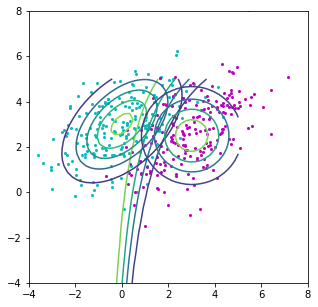

In [6]:

nx, ny = 50, 40
m1 = np.array([0,3])
m2=np.array([3,2.5])
C1 = np.array([[2,1], [1,2]], np.float32)
C2= np.array([[1.5,0], [0,1.5]], np.float32)
P1=P2=0.5
A=np.linalg.cholesky(C1)

U11=np.random.randn(NumDataPerClass,2)
X11=U11@A.T +m1

U22=np.random.randn(NumDataPerClass,2)
X22=U22@A.T +m2
X1,X2,X3=twoDGaussianPlot (nx, ny, m1, C1)
X4,X5,X6=twoDGaussianPlot (nx, ny, m2, C2)
Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X11[:,0], X11[:,1], c="c", s=4)
ax.scatter(X22[:,0], X22[:,1], c="m", s=4)
ax.set_xlim(-4, 8)
ax.set_ylim(-4, 8)
plt.contour(Xp, Yp, Zp, 5)
plt.contour(X1, X2, X3, 5)
plt.contour(X4, X5, X6, 5)



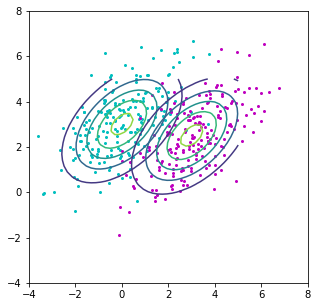

In [13]:
# Fisher LDA and ROC Curve 

nx, ny = 50, 40
m1 = np.array(([0,3]))
m1=m1.T
m2 = np.array(([3,2.5]))
m2=m2.T
C1 = np.array([[2,1], [1,2]], np.float32)
C2=C1
A=np.linalg.cholesky(C1)

U11=np.random.randn(NumDataPerClass,2)
X11=U11@A.T +m1

U22=np.random.randn(NumDataPerClass,2)
X22=U22@A.T +m2
X1,X2,X3=twoDGaussianPlot (nx, ny, m1, C1)
X4,X5,X6=twoDGaussianPlot (nx, ny, m2, C2)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X11[:,0], X11[:,1], c="c", s=4)
ax.scatter(X22[:,0], X22[:,1], c="m", s=4)
ax.set_xlim(-4, 8)
ax.set_ylim(-4, 8)
plt.contour(X1, X2, X3, 5)
plt.contour(X4, X5, X6, 5)



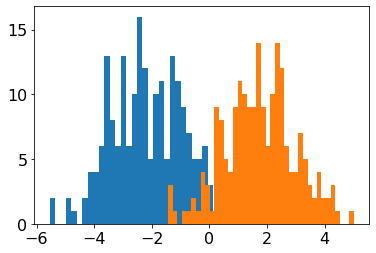

In [19]:
import matplotlib 
Ci = np.linalg.inv(2*C1)
uF = Ci @ (m2-m1)
yp1 = X11 @ uF
yp2 = X22 @ uF
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')

-5.543591298492506 5.013938229770946


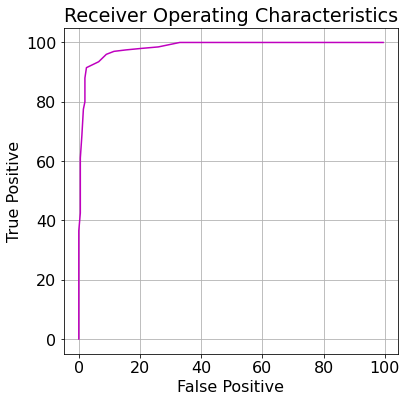

In [21]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
    FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
    ROC[i,:] = [TP, FP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve.png')

In [25]:
# 6. 
import numpy
numpy.trapz(ROC[:,1],ROC[:,0])

-166.125